# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:\\Learning\\DataSet\\Salary.csv")
df.head()


,age,education_level,years_experience,job_role,industry,certifications,hours_per_week,location,performance_score,communication_skill,leadership_skill,salary
0,55,none,21,manager,manufacturing,5,67,remote,52.0,92,21,94600.0
1,36,high_school,6,NaN,healthcare,3,32,suburban,92.0,2,40,37900.0
2,53,master,33,support,manufacturing,1,54,urban,12.0,29,55,79800.0
3,44,phd,26,manager,freelance,3,29,remote,44.0,95,70,99300.0
4,59,master,35,consultant,healthcare,0,39,suburban,85.0,93,38,66500.0


In [4]:
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)

IQR = Q3 - Q1
Upper_limit = Q3 +( 1.5 * IQR)
Lower_limit = Q1 -( 1.5 * IQR)

df_clean = df[(df["salary"]<Upper_limit) & (df["salary"]>Lower_limit)]







# Data Preprocession and Cleaning
 

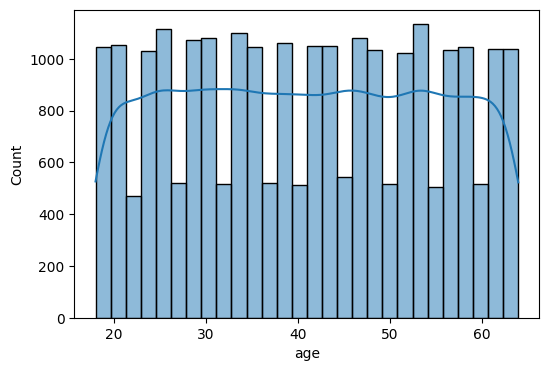

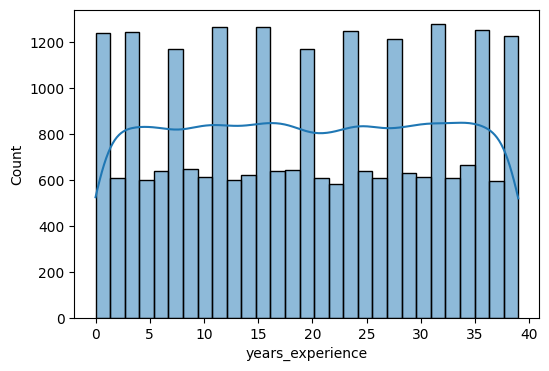

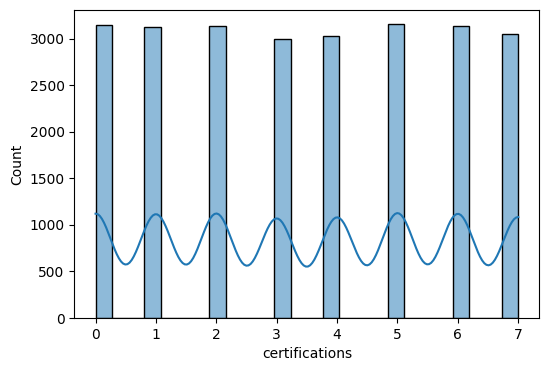

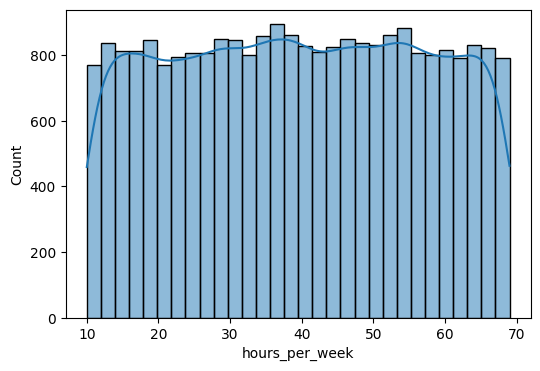

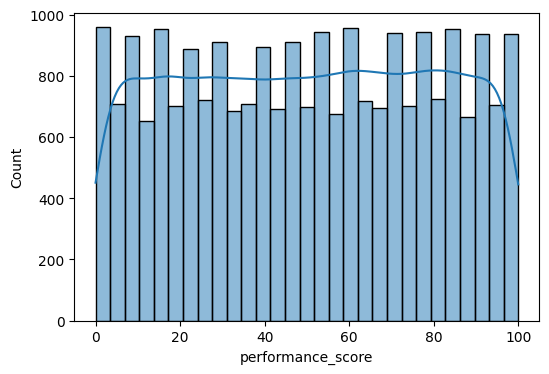

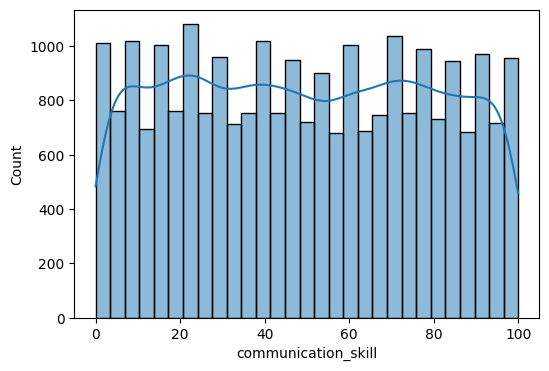

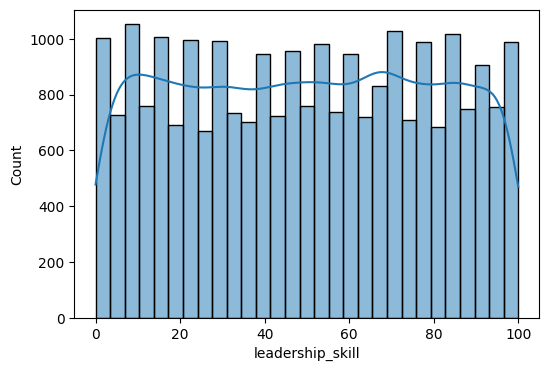

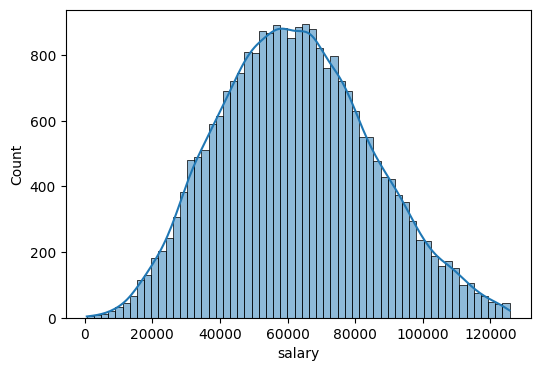

In [5]:
num_col = ["age","years_experience","certifications","hours_per_week",
           "performance_score","communication_skill","leadership_skill","salary"]

for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df_clean[col],kde=True)

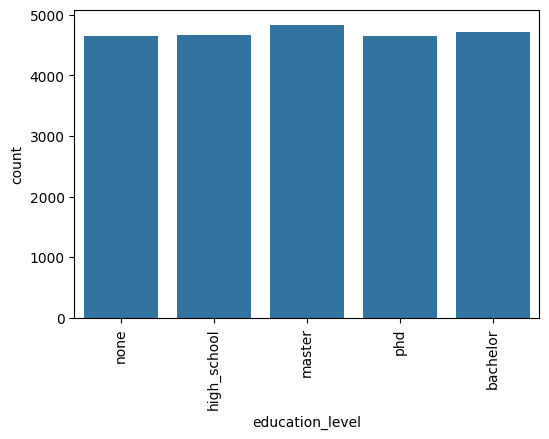

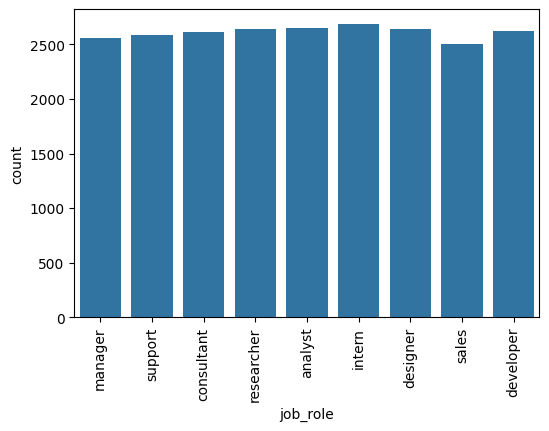

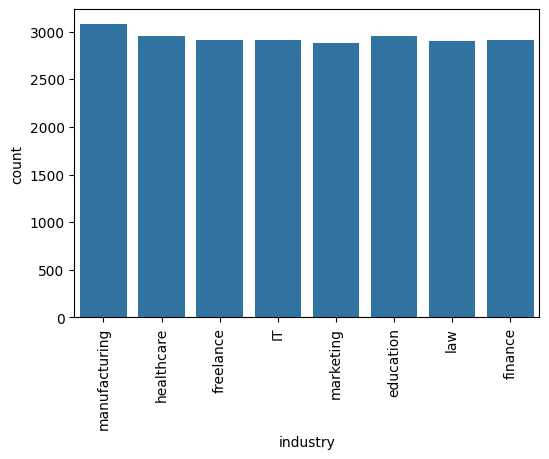

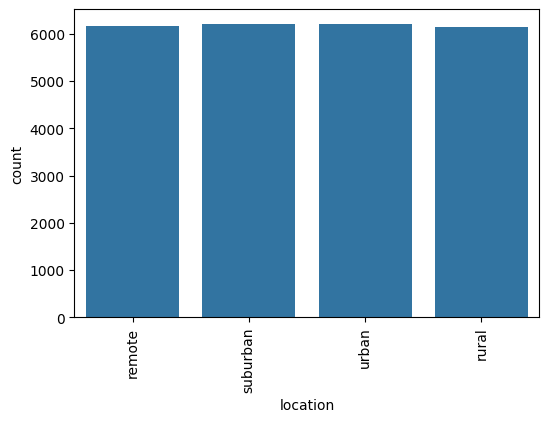

In [6]:
cat_col = ["education_level","job_role","industry","location"]
for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_clean[col])
    plt.xticks(rotation =90)


In [7]:
df_clean.isnull().sum()

age                       0
education_level        1232
years_experience          0
job_role               1239
industry               1239
certifications            0
hours_per_week            0
location                  0
performance_score      1242
communication_skill       0
leadership_skill          0
salary                    0
dtype: int64

In [8]:
mode_value = df["education_level"].mode()[0]
df_clean["education_level"] = df_clean["education_level"].fillna(mode_value)
df_clean.isnull().sum()

mode_value = df["job_role"].mode()[0]
df_clean["job_role"] = df_clean["job_role"].fillna(mode_value)


mode_value = df["industry"].mode()[0]
df_clean["industry"] = df_clean["industry"].fillna(mode_value)


mean_vlaue = df["performance_score"].mean()
df_clean["performance_score"] = df_clean["performance_score"].fillna(mean_vlaue)

df_clean.isnull().sum()

age                    0
education_level        0
years_experience       0
job_role               0
industry               0
certifications         0
hours_per_week         0
location               0
performance_score      0
communication_skill    0
leadership_skill       0
salary                 0
dtype: int64

<Axes: >

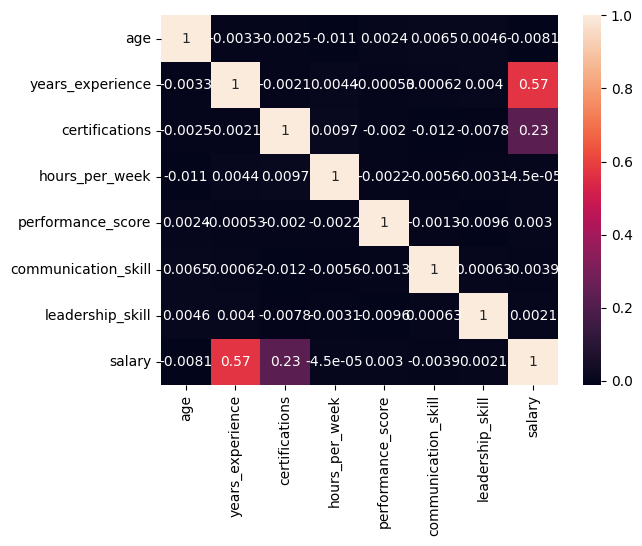

In [9]:
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)

In [10]:
target = "salary"
numerical_features = ["age", "years_experience", "certifications", "hours_per_week",
                      "performance_score", "communication_skill", "leadership_skill"]
categorical_features = ["education_level", "job_role", "industry", "location"]

from sklearn.model_selection import train_test_split
X = df_clean[numerical_features + categorical_features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

numerical_transformation = StandardScaler()
categorical_transformation = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ('num', numerical_transformation, numerical_features),
        ('cat', categorical_transformation, categorical_features)
    ]
)



# Linear Regtression


In [12]:
from sklearn.metrics import r2_score

pipeline = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


r2=r2_score(y_test,y_pred)
r2

n = X_test.shape[0]
p = X_test.shape[1]

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2
    

0.8170051875441027

# KNN model

In [13]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('model',KNeighborsRegressor(n_neighbors=25))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


r2=r2_score(y_test,y_pred)
r2

n = X_test.shape[0]
p = X_test.shape[1]

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2
    

0.6772637264314905

# DecisionTree


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
preprocess2 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformation, categorical_features)
    ],
    remainder='passthrough'  # numeric features stay
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocess2),
    ('model',DecisionTreeRegressor(max_depth=20,random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


r2=r2_score(y_test,y_pred)
r2

n = X_test.shape[0]
p = X_test.shape[1]

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2
    



0.6032246874640298

In [15]:
df_encoded = pd.get_dummies(df_clean,drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded

X1 = df_encoded.drop("salary",axis=1)
y1 = df_encoded["salary"]

x1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x1_train,y1_train)

y1_pred = model.predict(X1_test)

r2=r2_score(y1_test,y1_pred)
r2

n = X1_test.shape[0]
p = X1_test.shape[1]

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2


0.5875951349659516

# SVR

In [20]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR

pipeline = Pipeline(steps=[
    ('preprocessor', preprocess),
    ('model', SVR(kernel="linear"))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


r2=r2_score(y_test,y_pred)
r2

n = X_test.shape[0]
p = X_test.shape[1]

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2
    

0.3739744702542668